<a href="https://colab.research.google.com/github/sonovman/DL_Term_PJT/blob/main/Tutorial_2_Sobel_Opearatior_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리 로드

필요한 라이브러리를 로드해줍니다.

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


## 2. 데이터셋 로드

이번에도 [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) 데이터를 사용할 예정입니다. 

CIFAR-10에 대한 데이터 살펴보기 예제는 [이 포스트](https://github.com/Intelligence-Engineering-LAB-KU/Deeplearning-Tutorial/blob/master/Tutorial_2_Sobel_Opearatior.ipynb)를 복습해주세요.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


1번 인덱스에 위치한 말 이미지를 불러와보겠습니다.

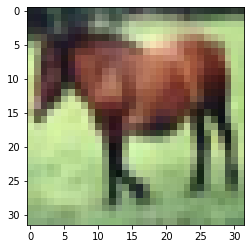

label:  [7]


In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(x_train[7].astype('uint8'), cmap=plt.cm.gray)
plt.show()

print('label: ', y_train[7])

Sobel opearatoin은 일반적으로 단일채널인 흑백 이미지에 적용됩니다. 3채널 이미지를 흑백 이미지로 만들어보겠습니다.


**[보충학습]**
**일반적으로 단일 채널 이미지에만 선형 필터를 사용한다. 이는 모델이 그레이스케일로 변환된 이미지를 Sobel 필터링 이미지로 매핑하도록 훈련된다는 것을 의미한다.**

shape: (32, 32)


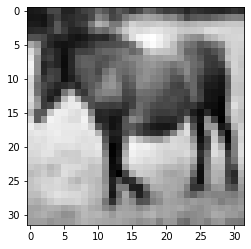

In [ ]:
def to_grayscale(img):
  return np.sum(img, axis=-1)/3

gray_img = to_grayscale(x_train[7])

print('shape:', gray_img.shape)
plt.figure(figsize=(4,4))
plt.imshow(gray_img.astype('uint8'), cmap=plt.cm.gray)
plt.show()

In [ ]:
## Sobel Filter

Kx = np.array([[+1, 0, -1], [+2, 0, -2], [+1, 0, -1]])
Ky = np.copy(Kx).T

print('Kx:\n', Kx)
print('Ky:\n', Ky)

Kx:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Ky:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


### 3. Sobel Opearation

이중 for 문으로 [Sobel Opearator](https://en.wikipedia.org/wiki/Sobel_operator) 을 구현해보겠습니다.

먼저 두 Sobel Filter를 만들어보겠습니다.

$K_{x} = \begin{bmatrix}+1&0&-1\\+2&0&-2\\+1&0&-1\end{bmatrix}$

$K_{y} = \begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\end{bmatrix}$




---



## **[소벨 필터 보충학습]**

**[보충학습]** Sober 필터는 **수직 소버 필터(Vertical Sobel filter)**와 **수평 소버 필터(horizontal Sobel filter)**이라는 한 쌍의 3×3 컨볼루션 커널로 구성된다. 

**수직 소버 필터(vertical Sobel filter)**는 0으로 채워진 가운데 제 2열(col.)을 중심선으로 맨 왼쪽 제 1열(col.)과 맨 오른쪽 제 3열(col.)은 서로 대칭하여 부호가 반대이고 같은 값으로 채워져 있다. 이것이 $K_x$ 이다. 


$K_{x} = \begin{bmatrix}+1&0&-1\\+2&0&-2\\+1&0&-1\end{bmatrix}$

**수평 소버 필터(horizontal Sobel filter)**는 0으로 채워진 가운데 제 2 행(row)을 중심선으로 맨 위 제 1 행(row)과 맨 아래 제 3 행(row)은 서로 대칭하여 부호가 반대이고 같은 값으로 채워져 있다. 이것이 $K_y$ 이다. 


$K_{y} = \begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\end{bmatrix}$

A를 원본 이미지로 정의 하고 $G_x$ 및 $G_y$ 가 각 지점에서 각각 수평 및 수직 미분 근사를 포함하는 두 개의 이미지라고 정의하면 계산은 다음과 같다. 여기서 $\otimes$는 2차원 신호 처리 컨벌루션 연산을 나타낸다.

$\mathbb{G}_{x} = \begin{bmatrix}+1&0&-1\\+2&0&-2\\+1&0&-1\end{bmatrix} \otimes \mathbb{A}$  

$\mathbb{G}_{y} = \begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\end{bmatrix} \otimes \mathbb{A}$  

실제 소버필터가 어떻게 작동하는지를 확인하기 위해 우선 엑셀에서 두 형태의 소보필터로 합성곱 연산을 해보고, 다음으로 Gimp 앱을 이용하여 실제 이미지에 대한 소버 필터링 효과를 확인해본다

**[소버 필터링 작동원리 확인]**

**수직 소버 필터**는 아래 엑셀 실습 그림에서 볼 수 있듯이, 열 데이터의 대칭성으로 합성곱 대상이 되는 이미지 데이터 배열(Matrix)이 열 방향(수직)의 가장자리(edge)에서 값의 변화가 클 수록 큰 값으로 응답하고 (엣지 검출 효과), 그 외 대칭되거나 분산되면 상쇄시켜 평탄하게 만든다(노이즈 필터링 및 평활화 효과). 즉 이미지와 합성곱할 때 필터링하는 영역의 이미지 데이터들이 값이 큰 차이가 없으면 상쇄시키고 차이가 클 수록 크게 두드리게 강화시킨다.

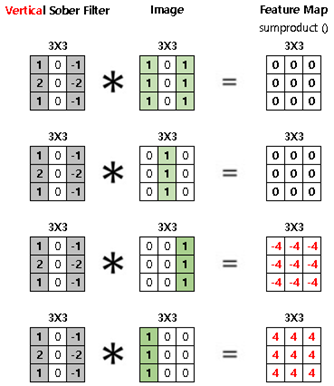

**수평 소버 필터**는 아래 엑셀 실습 그림에서 볼 수 있듯이, 행 데이터의 대칭성으로 합성곱 대상이 되는 이미지 데이터 배열(Matrix)이 행 방향(수직)의 가장자리(edge)에서 값의 변화가 클 수록 큰 값으로 응답하고 (엣지 검출 효과), 그 외 대칭되거나 분산되면 상쇄시켜 평탄하게 만든다(노이즈 필터링 및 평활화 효과). 즉 이미지와 합성곱할 때 필터링하는 영역의 이미지 데이터들이 값이 큰 차이가 없으면 상쇄시키고 차이가 클 수록 크게 두드리게 강화시킨다.

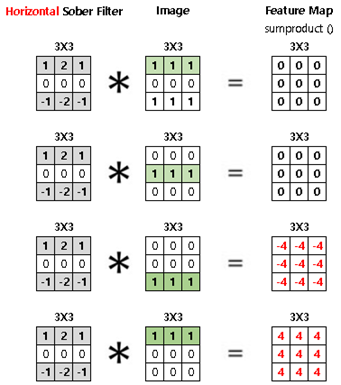

**[실제 이미지에 대한 소버 필터링 효과 확인]**

소버 필터는 계산 속도가 느리지만 더 큰 컨볼루션 커널이 입력 이미지를 더 매끄럽게 처리하므로 연산자가 노이즈에 덜 민감하고, 이미지의 자연스러운 가장자리는 종종 Sobel 연산자의 평활화 효과로 인해 출력 이미지에서 여러 픽셀 너비의 선으로 이어진다고 한다.

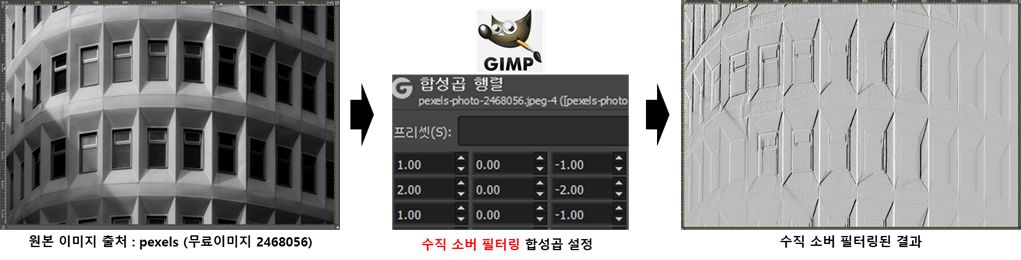

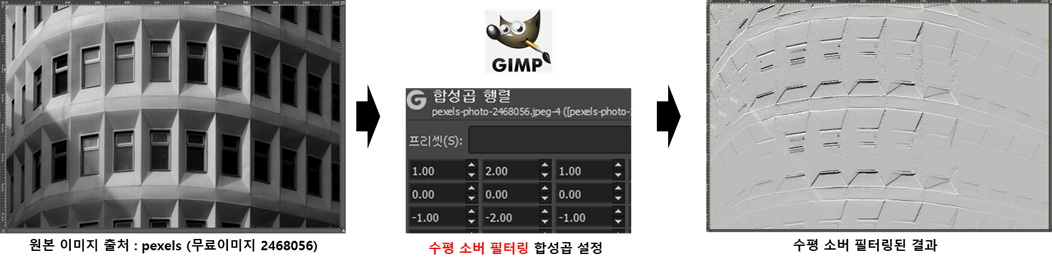



---



## **[합성곱 보충학습]**

#### **합성곱이란(수학)**

수학적으로 합성곱(合成-) 또는 콘벌루션(convolution)은 하나의 함수와 또 다른 함수를 반전 이동한 값을 곱한 다음, 구간에 대해 적분하여 새로운 함수를 구하는 수학 연산자이다. 두 개의 함수 $f$와 $g$가 있을 때, 두 함수의 합성곱을 수학 기호로는 $f*g$와 같이 표시한다.

합성곱 연산은 두 함수 $f, g$ 가운데 하나의 함수를 반전(reverse), 전이(shift)시킨 다음, 다른 하나의 함수와 곱한 결과를 적분하는 것을 의미한다.

이산 함수의 경우, 합성곱을 다음과 같이 정의 한다.

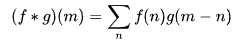

엄격하게 말하면, 전이만 하고 반전이 없는 경우는 합성곱이 아니라 상호상관(Cross-correlation)이라 한다. 1D 데이터에서는 콘벌루션(convolution)도 신호의 반전이 없으나, 2D 데이터에서는 콘벌루션(convolution)이라면 반전이 있어야 한다. 그러나 CNN의 입력으로 사용하는 이미지 데이터를 반전시키면 일종에 mirror 데이터가 되어 반전을 하지 않는 것과 다를 바 없다. 이런 측면에서 딥러닝 분야에서는 반전이 없는 전이 만으로 CNN의 합성곱 연산자로 사용한다.

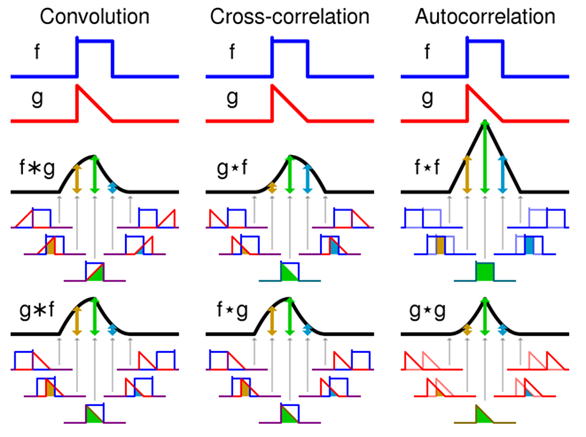

#### **합성곱 함수 구현 원리 이해 (선형대수)**

CNN의 합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 한다. 합성곱(Convloution)은 커널(kernel) 또는 필터(filter)라는 $n$ × $m$ 크기의 행렬로 높이($height$)×너비($width$) 크기의 이미지를 처음부터 끝까지 겹치며 훑으면서 $n$ × $m$ 크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 것을 말한다. 이때, 이미지의 가장 왼쪽 위부터 가장 오른쪽까지 순차적으로 훑는다.

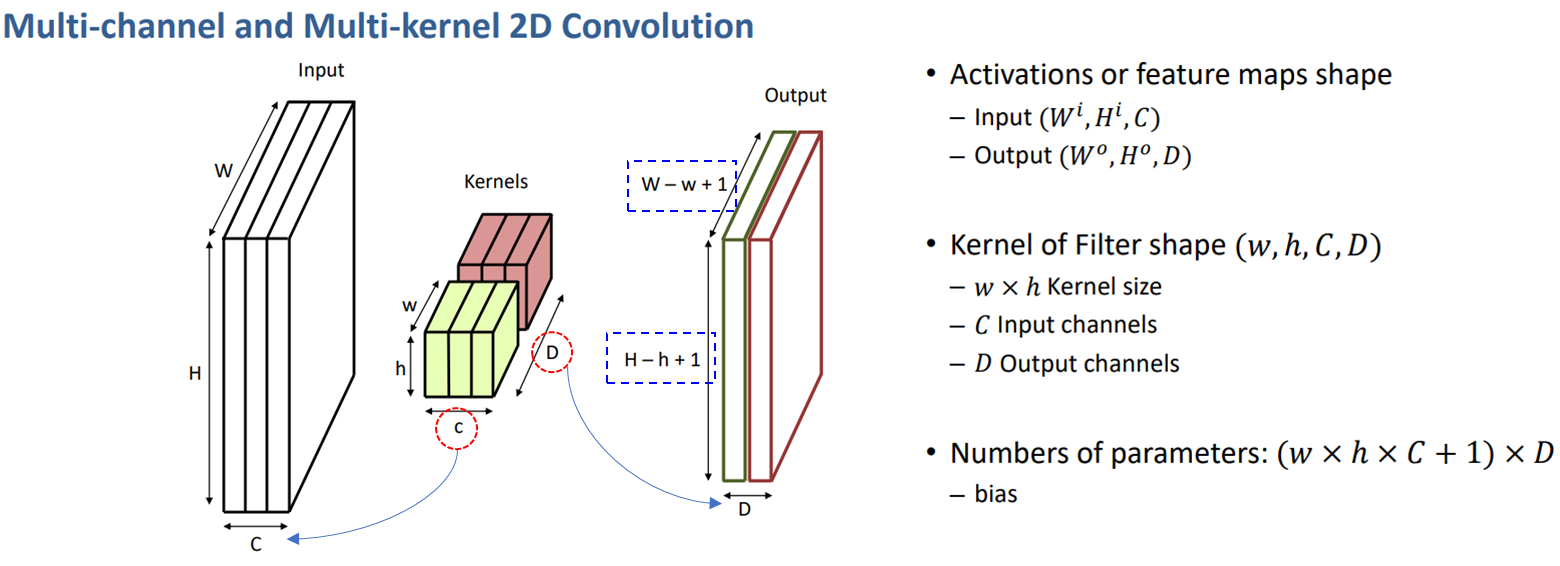

아래 움직이는 그림은 3 × 3 크기의 필터(2차원)로 5 × 5 의 이미지 행렬(2차원)에 합성곱 연산을 수행하는 과정을 보여준다. 

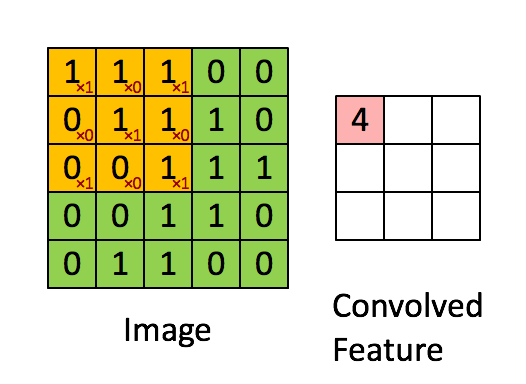

<그림 출처> [Deep-Learning-Coursera/Convolutional Neural Networks](https://github.com/enggen/Deep-Learning-Coursera/blob/master/Convolutional%20Neural%20Networks/Week1/Convolution%20model%20-%20Step%20by%20Step%20-%20v2.ipynb)

위 그림은 보폭(Stride)이 1인 5 × 5 이미지에 합성곱 연산을 수행하는 3 × 3 필터(filter)의 움직임을 보여준다. 한 번의 연산을 1 스텝(step)이라고 하였을 때, 합성곱 연산의 9번째 스텝까지 이미지와 식으로 표현되었다. 최종적으로 3 × 3의 크기의 행렬(Matrix)을 얻는다. 이렇게 특성 맵(feature map)을 얻는다. 

**흥미로운 것은 합성곱 연산을 구현할 때 원래는 필터를 이동하여야 하나, 실제 구현은 필터는 움직이지 않고 이미지에서 필터와 연산할 부분을 이동하면서 추출하는 방법을 이용한다는 것이다다.**

이미지 행렬을 필터 크기만큼 왼쪽상단부터 잘라내 추출한 후, 우측으로 특성맵의 x 행(row) 크기에 이를 때까지 stride (=1)만큼 반복 이동하면서 필터 크기만큼 잘라내 추출하는 동작을 아래로 특성맵(출력결과 행렬)의 y 열(column) 크기에 이를 때까지 반복하는 동작을 기본 동작으로 한다.


이때, 특성맵(출력결과 행렬)의 크기는 아래와 같고, 이동폭 strdie는 1로 한다.

      - 행 크기 : output_x_size = img_x_size - filter_x_size +1
      - 열 크기 : output_y_size = img_y_size - filter_y_size +1


이렇게 이미지 행렬로부터 차례로 필터크기만큼 특정 부분 행렬을 잘라내 추출하는 과정을 파이썬으로 구현하면, 아래와 같다. 

In [ ]:
import numpy as np

A = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])

for i in range(2):
    for j in range(2):
        a1 = np.array(A[i:i+3, j:j+3])
        print(a1)

[[1 2 3]
 [0 1 2]
 [3 0 1]]
[[2 3 0]
 [1 2 3]
 [0 1 2]]
[[0 1 2]
 [3 0 1]
 [2 3 0]]
[[1 2 3]
 [0 1 2]
 [3 0 1]]


i = 0 일때, j = 0 ~ 1 : x[0:2, 0:2] ~ x[0:2, 1:3] (우측으로 한칸씩 이동하며 데이터 추출)

다음, 한 행 내려, 

i = 1 일때, j = 0 ~ 1 : x[1:3, 1:3] ~ x[1:3, 1:3] (우측으로 한칸씩이동하며 데이터 추출)

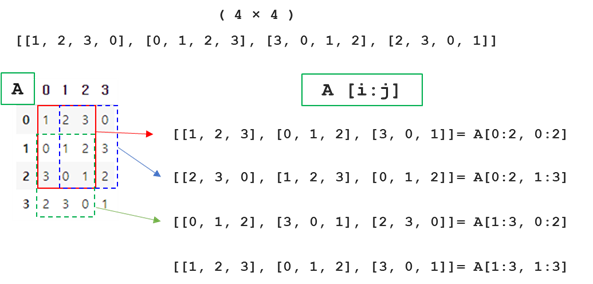

**A**와 **B**의 합성곱을 파이썬으로 구현하면, B의 형태가 필터가 되어 A행렬에서 B와 연산하게 될 행렬부분의 데이터를 뽑아내야 한다.

- **A**= np.array([ [1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1] ])
- **B** = np.array([[2,0,1],[0,1,2],[1,0,2]])

그리고 위에서 출력한 1차원 배열인 [15,16, 6, 15] 결과를 최종 결과 행렬의 크기 2x2 행렬로 변경하여야 한다.

In [ ]:
import numpy as np

a=np.array([ [1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1] ])

b=np.array([[2,0,1],[0,1,2],[1,0,2]]) #뽑고자 하는 형태, 또는 필터

result=[]

for i in range(len(a)-len(b)+1): #4-3+1 = 0

    for j in range(len(a)-len(b)+1): # 4-3+1 = 0

        result.append( np.sum( a[i:3+i,j:3+j] * b  ))

 

result = np.array(result)

result = result.reshape(2,2)

print(result)

[[15 16]
 [ 6 15]]


**이제 Convolution 함수를 만들어보겠습니다.**

## **[Quiz 풀이 : Python으로 Convolution Operator 구현하기]**

In [ ]:
def conv(img, filter):   # np.array
  
  img_x_size, img_y_size = img.shape

  filter_x_size, filter_y_size = filter.shape

  output_x_size = img_x_size - filter_x_size +1
  output_y_size = img_y_size - filter_y_size +1

  output = np.zeros((output_x_size, output_y_size)) # 2D array of zeros

  # Iterate over the rows (x 행 반복)
  for i in range(output_x_size):
    # Iterate over the columns (y 열 반복)
    for j in range(output_y_size):
  
        # 현 행렬 구하기
        # img[i, j] = individual pixel value
        mat = img[i:i+filter_x_size, j:j+filter_y_size ]

        # 합성곱 적용 - 결과의 요소별 곱셈(element-wise multiplication) 및 합산
        # 출력 배열의 i번째 행과 j번째 열에 결과 저장
        output[i, j] = np.sum(np.multiply(mat, filter))
      
  return output

In [ ]:
m=[[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]] 
f=[[2,0,1],[0,1,2],[1,0,2]]

img = np.array(m)  
filter = np.array(f)

     
print('Filters:', filter.shape)
out = conv(img, filter)
print('Output:', out.shape)
print(out)

Filters: (3, 3)
Output: (2, 2)
[[15. 16.]
 [ 6. 15.]]


In [ ]:
import pandas as pd
display(pd.DataFrame(img))


,0,1,2,3
0,1,2,3,0
1,0,1,2,3
2,3,0,1,2
3,2,3,0,1


In [ ]:
img.shape

(4, 4)



---



## **[Sobel Opearator 구현]**

Convolution operation과 Sobel Filter를 이용하여 다음과 같이 Sobel Opearator를 구현해보겠습니다. 그리고 구현된 sobel operation으로 말 이미지의 윤곽을 추출해보겠습니다.



---



**[보충학습] 참고 : 위키피디아 소벨 연산자에 대한 수학적 해석석**

A를 원본 이미지로 정의 하고 $G_x$ 및 $G_y$ 가 각 지점에서 각각 수평 및 수직 미분 근사를 포함하는 두 개의 이미지라고 정의하면 계산은 다음과 같다. 여기서 $\otimes$는 2차원 신호 처리 컨벌루션 연산을 나타낸다.

$\mathbb{G}_{x} = \begin{bmatrix}+1&0&-1\\+2&0&-2\\+1&0&-1\end{bmatrix} \otimes \mathbb{A}$  

$\mathbb{G}_{y} = \begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\end{bmatrix} \otimes \mathbb{A}$  

Sobel 커널은 평균 및 미분 커널의 곱으로 분해될 수 있으므로 평활화를 사용하여 기울기를 계산합니다. 예를 들어,  $G_{x}$로 쓸 수 있다.

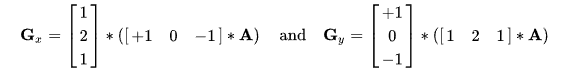

여기서 x 좌표는 "오른쪽" 방향 으로 증가하는 것으로 정의되고 y 좌표는 "아래" 방향으로 증가하는 것으로 정의된다. 

이미지의 각 지점에서 결과 그래디언트 근사값을 결합하여 다음을 사용하여 그래디언트 크기를 제공할 수 있다.

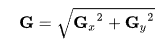

이 정보를 사용하여 그래디언트의 방향을 계산할 수도 있다.

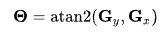

예를 들어, $ϴ$ 오른쪽이 더 밝은 세로 가장자리의 경우 0이다.



---



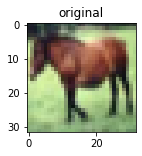

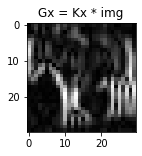

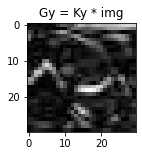

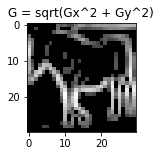

In [ ]:
def sobel (img, thresold=180):
  convx = conv(img, Kx)
  convy = conv(img, Ky)
  output = np.sqrt(convx**2 + convy**2)
  mask = output > thresold
  return output * mask

plt.figure(figsize=(2,2))
plt.imshow(x_train[7].astype('uint8'))
plt.title('original')
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(np.abs(conv(to_grayscale(x_train[7]), Kx)), cmap=plt.cm.gray)
plt.title('Gx = Kx * img')
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(np.abs(conv(to_grayscale(x_train[7]), Ky)), cmap=plt.cm.gray)
plt.title('Gy = Ky * img')
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(sobel(to_grayscale(x_train[7])), cmap=plt.cm.gray)
plt.title('G = sqrt(Gx^2 + Gy^2)')
plt.show()

soboel opearation을 다양한 클래스에 적용해보겠습니다.

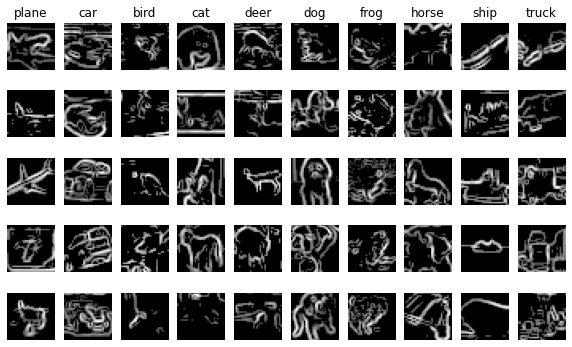

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5

plt.figure(figsize=(10,6))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(sobel(to_grayscale(x_train[idx])), cmap=plt.cm.gray)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()



---



###### **[Numpy Coding 보충학습]**

어떤 조건을 만족하는 요소로 이루어진 배열을 구해낼 때 boolean array를 이용한 연산이 매우 유용하다. **만약 그 위치 index 를 구하고 싶다면, np.nonzero() 또는 np.where(), np.flatnonzero() 를 사용한다.**

[출처] https://jrcho.github.io/2018/01/20/Ch.3.Numpy.html

In [ ]:
a = np.array([1.2,-1.3,2.2,5.3,3.7])

np.nonzero(a>2)   # tuple로 리턴.  Np.nonzero(a>2)[0][0]으로 써야 첫번째 index (array([2, 3, 4], dtype=int64),)

(array([2, 3, 4]),)

In [ ]:
np.flatnonzero(a>2)   # array로 리턴, np.flatnonzero(a>2)[0]이면 첫번째 index (array([2, 3, 4], dtype=int64),)

array([2, 3, 4])



---



## **[합성곱 필터 예 보충학습]**

합성곱을 이용한 이미지 필터링 예는 소버 필터링만 있는 것이 아니다. 아래에서는 대표적인 합성곱 필터에 대하여 알아본다. 

#### **1) Simple box blur (평균화)**

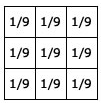

이 행렬의 모든 요소의 합은 1.0 이다. 이 특성 때문에 합계가 정확히 1이 아니면 결과 이미지가 더 밝거나 더 어두워진다.

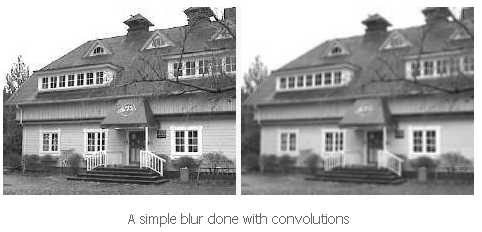

#### **2) Gaussian blur**

가우시안 블러에는 컴퓨터 비전에 중요한 특정 수학적 속성이 있다. 그리고 이미지 컨볼루션으로 근사할 수 있다. 가우시안 블러에 대한 이미지 컨벌루션 커널은 다음과 같다.

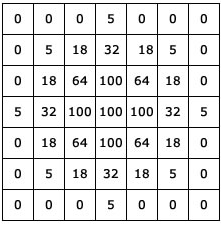

아래는 가우시안 블러 커널을 적용한 예이다.

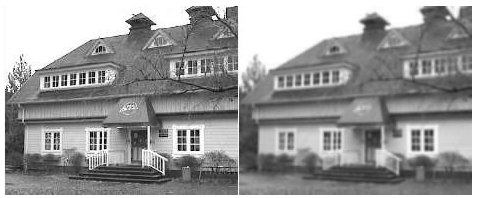

#### **3) 직선감지기 (Line detection with image convolutions)**

이미지 컨볼루션을 사용하면 선을 쉽게 감지할 수 있다. 아래와 같이, 수평선, 수직선 및 45도 경사선을 감지하는 네 가지 컨볼루션이 있다.


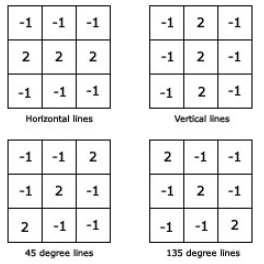

아래는 이 이미지 컨볼루션을 이용하여 집 이미지에서 수평선을 찾은 결과다.

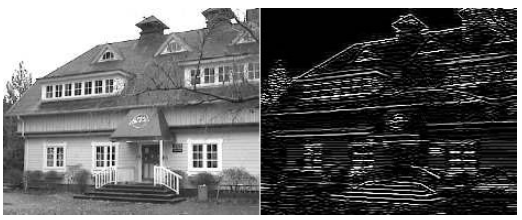

#### **4) 가장자리 감지 (Edge Detector)**

이 커널은 일종의 에지 감지기이다. 커널에는 수평선과 수직선에 대해 별도의 구성 요소을 가지고 있다. 결과를 "결합"(combine)하는 방법은 컨볼루션 커널을 병합하는 것이다. 새로운 이미지 컨볼루션 커널은 다음과 같다.

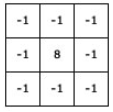

아래는 가장자리 감지한 결과이다.

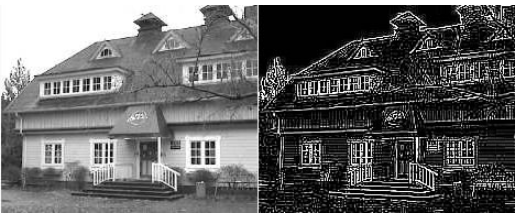

#### **5) 가우스의 라플라시안 (The Laplacian of Gaussian)**

노이즈에 극도로 민감한 라플라시안 커널의 단점을 극복하기 위해 만들어졌다.  라플라시안 전에 이미지를 부드럽게 하면 우리가 얻는 결과가 향상된다. 이것은 5x5 이미지 컨볼루션 커널로 수행된다.

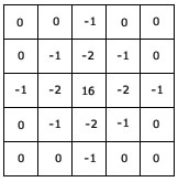

이 이미지 컨볼루션을 적용한 결과는 다음과 같다.

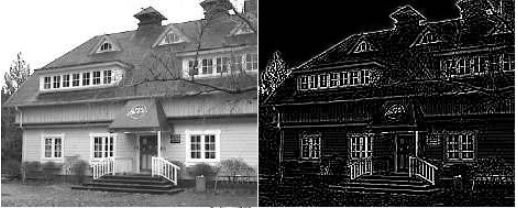



---




## Reference

- [cs231n](http://cs231n.github.io/)
- [Keras tutorial on CIFAR-10](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)

## 추가 참고자료 (Reference Plus)

- [cs231n](http://cs231n.github.io/)
- [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/)
- [Deep Learning with Python 2판 자료](https://codingalzi.github.io/dlp/)
- [Keras tutorial on CIFAR-10](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)
- [Edge detection with Convolutional Neural Network - Part 1](https://tonio73.github.io/data-science/cnn/CnnEdgeDetection-Keras-Part1.html)
- [Sobel Edge Detector](https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm)
- [Edge detection, Wikipedia](https://en.wikipedia.org/wiki/Edge_detection)
- [Sobel operator, Wikipedia](https://en.wikipedia.org/wiki/Sobel_operator)
- [Image convolution examples, AI Shake](http://aishack.in/tutorials/image-convolution-examples/)
- [vexcel/Keras-LearnLinearFilter-github](https://github.com/vexcel/Keras-LearnLinearFilter)
- [Learning to perform linear filtering using natural image data](https://towardsdatascience.com/learning-to-perform-linear-filtering-using-natural-image-data-db289d0b0457)
- [A Beginner's Guide to Convolutional Neural Networks (CNNs), 김수현](https://towardsdatascience.com/a-beginners-guide-to-convolutional-neural-networks-cnns-14649dbddce8)
- [How to Develop a CNN From Scratch for CIFAR-10 Photo Classification](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)

---
- [TensorFlow for Computer Vision — How to Implement Convolutions From Scratch in Python](https://towardsdatascience.com/tensorflow-for-computer-vision-how-to-implement-convolutions-from-scratch-in-python-609158c24f82)
- [2D Convolution using Python & NumPy](https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381)
- [안경잡이개발자_Convolution 연산](https://ndb796.tistory.com/651)
- [딥러닝 직접 구현하기_cdjs의 코딩 공부방](https://cding.tistory.com/112)
- [누구나 이해할 수 있는 딥러닝 - cs231n 5강 (Convolutional Neural Networks, CNN)](https://cding.tistory.com/category/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%88%84%EA%B5%AC%EB%82%98%20%EC%9D%B4%ED%95%B4%ED%95%A0%20%EC%88%98%20%EC%9E%88%EB%8A%94%20%EB%94%A5%EB%9F%AC%EB%8B%9D%28cs231n%29)
- [파이썬으로 딥러닝하기](https://everyday-deeplearning.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0-CNNConvolution-Neural-Network)
- [Implement Convolutional Layer in Python](https://meatba11.medium.com/implement-convolutional-layer-in-python-5ee4ceebc341)
- [Multi-Channel Convolutions explained with… MS Excel!](https://medium.com/apache-mxnet/multi-channel-convolutions-explained-with-ms-excel-9bbf8eb77108)
- [합성곱 연산 알고리즘](https://loklee9.tistory.com/156)
- [합성곱 신경망(CNN)](https://osh88itopia.tistory.com/95)
- [심층 합성곱 신경망으로 이미지 분류_gilbutITbook](https://github.com/gilbutITbook/007022/blob/master/code/ch15/ch15.ipynb)
- [데이터 사이언스 스쿨](https://datascienceschool.net/intro.html)
- [PyTorch로 시작하는 딥 러닝 입문](https://wikidocs.net/book/2788)


---
- [CNN 역전파를 이해하는 가장 쉬운 방법](https://metamath1.github.io/cnn/index.html)


**[EOD]**